In [1]:
import numpy as np
import pandas as pd
np.random.seed(3) 
import matplotlib.pyplot as plt

In [2]:
class DummyLinearRegression:
    def __init__(self,lr=0.01):
        self.learnning_rate = lr

    def y_pred(self,slopes,bias,x):
        return np.reshape(x.dot(slopes), (-1,1)) + bias
    
    def calc_gradients(self,x,y,slopes,bias):
        diff = y - self.y_pred(slopes,bias,x)
        slopes_grad = np.mean(diff * x,axis=0)
        bias_grad = np.mean(diff)
        cost_function = np.mean(np.square(diff))
        return slopes_grad,bias_grad,cost_function

    def fit(self,x,y):
        self.comparisions = {'slopes':[],
                             'bias':[],
                             'loss':[]}
        difference = 1
        old_cost_function = 0
        
        slopes = np.random.rand(np.shape(x)[1])
        bias = np.random.rand(1)
        
        while difference > 1e-5:
            slopes_grad,bias_grad,cost_function = self.calc_gradients(x, y,slopes,bias)
            difference = np.absolute(cost_function-old_cost_function)
            slopes,bias = slopes + self.learnning_rate * slopes_grad, bias + self.learnning_rate * bias_grad
            old_cost_function = cost_function
            
            self.comparisions['slopes'].append(slopes)
            self.comparisions['bias'].append(bias)
            self.comparisions['loss'].append(cost_function)
        
        self.model_params = slopes,bias  
        return cost_function
    def predict(self,x):
        try:
            slopes,bias = self.model_params
            return x.dot(slopes)+bias
        except Exception as e:
            raise "Please fit with data first"

In [3]:
path = "data/tvmarketing.csv"
adv = pd.read_csv(path)
adv_norm = (adv - np.mean(adv))/np.std(adv)

/home/kamal/Desktop/MeExploring/Math/Mathematics-for-Machine-Learning-and-Data-Science-Specialization-Coursera/C2/w3/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [4]:
adv_norm

,TV,Sales
0,1.746481,-11.227526
1,-0.420747,-13.475626
2,-0.739526,-13.686985
3,0.828679,-11.919249
4,1.170811,-12.995263
...,...,...
195,-0.494311,-14.013632
196,0.159594,-13.610127
197,1.126439,-13.014477
198,2.371194,-10.574233


In [5]:
lr=DummyLinearRegression(lr=0.01)
lr.fit(adv_norm[['TV']].to_numpy(),adv_norm[['Sales']].to_numpy())

np.float64(0.3891806604112535)

In [6]:
lr.comparisions.keys()

dict_keys(['slopes', 'bias', 'loss'])

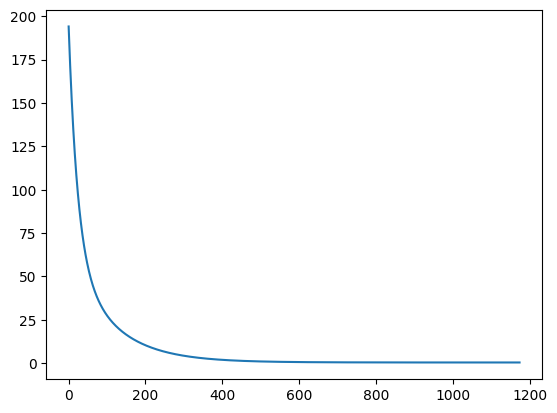

In [7]:
plt.plot(lr.comparisions['loss'])

In [8]:
df = pd.read_csv('data/house_prices_train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df[['SalePrice']]

In [10]:
X_multi

,GrLivArea,OverallQual
0,1710,7
1,1262,6
2,1786,7
3,1717,7
4,2198,8
...,...,...
1455,1647,6
1456,2073,6
1457,2340,7
1458,1078,5


In [11]:
X_multi_norm = (X_multi - np.mean(X_multi, axis=0))/np.std(X_multi, axis=0)
Y_multi_norm = (Y_multi - np.mean(Y_multi, axis=0))/np.std(Y_multi, axis=0)

In [12]:
np.mean(X_multi_norm, axis=0)

GrLivArea     -1.277517e-16
OverallQual    1.387018e-16
dtype: float64

In [13]:
lr=DummyLinearRegression(lr=0.01)
lr.fit(X_multi_norm.to_numpy(), Y_multi_norm.to_numpy())

np.float64(0.2863188390218089)

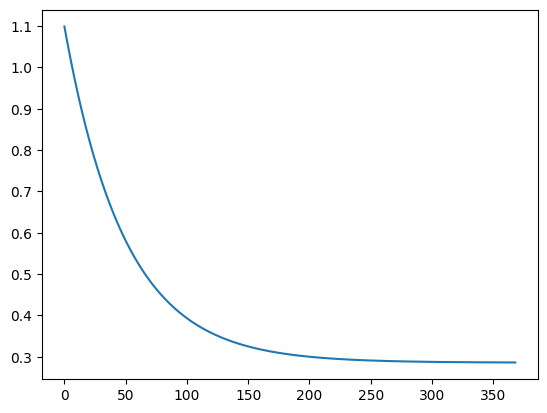

In [ ]:
plt.plot(lr.comparisions['loss'])